In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
train_data_path = "C:\\Users\\Faisal khan\\Downloads\\data-20221220T102922Z-001\\data\\train"

In [3]:
validation_data_path = "C:\\Users\\Faisal khan\\Downloads\\data-20221220T102922Z-001\\data\\val"

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [6]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [7]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [8]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


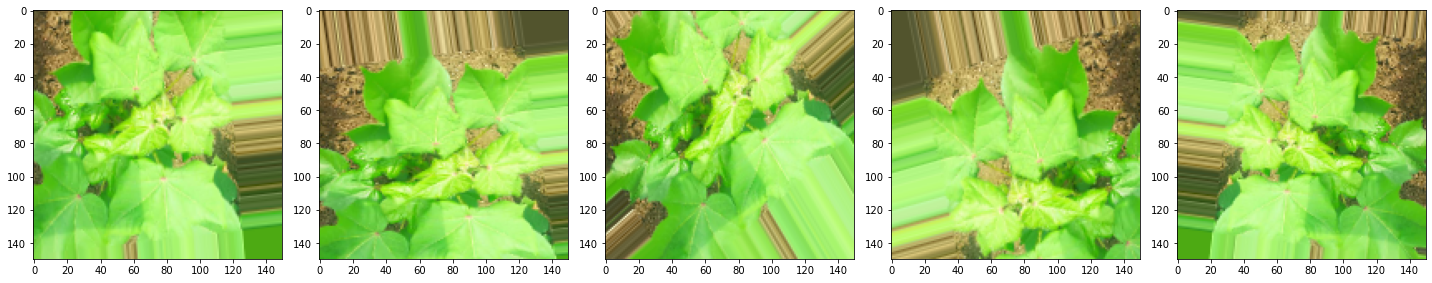

In [10]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [11]:

model_path = 'C:\\Users\\Faisal khan\\Downloads\\data-20221220T102922Z-001\\model'

In [12]:
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [13]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [14]:
# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 1.2393 - accuracy: 0.4403
Epoch 1: val_accuracy improved from -inf to 0.41667, saving model to C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 108s 2s/step - loss: 1.2393 - accuracy: 0.4403 - val_loss: 1.1711 - val_accuracy: 0.4167
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 1.0346 - accuracy: 0.5643
Epoch 2: val_accuracy improved from 0.41667 to 0.51852, saving model to C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 107s 2s/step - loss: 1.0346 - accuracy: 0.5643 - val_loss: 1.0000 - val_accuracy: 0.5185
Epoch 3/500
61/61 [==============================] - ETA: 0s - loss: 0.9220 - accuracy: 0.6233
Epoch 3: val_accuracy improved from 0.51852 to 0.63889, saving model to C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 111s 2s/step - loss: 0.9220 - accuracy: 0.6233 - val_loss: 0.8978 - val_accuracy: 0.6389
Epoch 4/500
61/61 [==============================] - ETA: 0s - loss: 0.8612 - accuracy: 0.6479
Epoch 4: val_accuracy improved from 0.63889 to 0.70679, saving model to C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 111s 2s/step - loss: 0.8612 - accuracy: 0.6479 - val_loss: 0.7446 - val_accuracy: 0.7068
Epoch 5/500
61/61 [==============================] - ETA: 0s - loss: 0.8117 - accuracy: 0.6709
Epoch 5: val_accuracy improved from 0.70679 to 0.73148, saving model to C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 110s 2s/step - loss: 0.8117 - accuracy: 0.6709 - val_loss: 0.6885 - val_accuracy: 0.7315
Epoch 6/500
61/61 [==============================] - ETA: 0s - loss: 0.8473 - accuracy: 0.6658
Epoch 6: val_accuracy did not improve from 0.73148
61/61 [==============================] - 102s 2s/step - loss: 0.8473 - accuracy: 0.6658 - val_loss: 0.8032 - val_accuracy: 0.6543
Epoch 7/500
61/61 [==============================] - ETA: 0s - loss: 0.7792 - accuracy: 0.6904
Epoch 7: val_accuracy did not improve from 0.73148
61/61 [==============================] - 104s 2s/step - loss: 0.7792 - accuracy: 0.6904 - val_loss: 0.8023 - val_accuracy: 0.6852
Epoch 8/500
61/61 [==============================] - ETA: 0s - loss: 0.7691 - accuracy: 0.6935
Epoch 8: val_accuracy did not improve from 0.73148
61/61 [==============================] - 104s 2s/step - loss: 0.7691 - accuracy: 0.6935 - val_loss: 0.7189 - val_accuracy: 0.7253
Epoch 9/500
61/61 [=======================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 99s 2s/step - loss: 0.7075 - accuracy: 0.7330 - val_loss: 0.6133 - val_accuracy: 0.7469
Epoch 13/500
61/61 [==============================] - ETA: 0s - loss: 0.6717 - accuracy: 0.7422
Epoch 13: val_accuracy did not improve from 0.74691
61/61 [==============================] - 97s 2s/step - loss: 0.6717 - accuracy: 0.7422 - val_loss: 0.7270 - val_accuracy: 0.7099
Epoch 14/500
61/61 [==============================] - ETA: 0s - loss: 0.6455 - accuracy: 0.7545
Epoch 14: val_accuracy improved from 0.74691 to 0.77160, saving model to C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 104s 2s/step - loss: 0.6455 - accuracy: 0.7545 - val_loss: 0.5667 - val_accuracy: 0.7716
Epoch 15/500
61/61 [==============================] - ETA: 0s - loss: 0.6066 - accuracy: 0.7647
Epoch 15: val_accuracy improved from 0.77160 to 0.79938, saving model to C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 103s 2s/step - loss: 0.6066 - accuracy: 0.7647 - val_loss: 0.4911 - val_accuracy: 0.7994
Epoch 16/500
61/61 [==============================] - ETA: 0s - loss: 0.5710 - accuracy: 0.7719
Epoch 16: val_accuracy did not improve from 0.79938
61/61 [==============================] - 97s 2s/step - loss: 0.5710 - accuracy: 0.7719 - val_loss: 0.6515 - val_accuracy: 0.7222
Epoch 17/500
61/61 [==============================] - ETA: 0s - loss: 0.5778 - accuracy: 0.7868
Epoch 17: val_accuracy did not improve from 0.79938
61/61 [==============================] - 97s 2s/step - loss: 0.5778 - accuracy: 0.7868 - val_loss: 0.5628 - val_accuracy: 0.7377
Epoch 18/500
61/61 [==============================] - ETA: 0s - loss: 0.5512 - accuracy: 0.7822
Epoch 18: val_accuracy improved from 0.79938 to 0.84568, saving model to C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 111s 2s/step - loss: 0.5512 - accuracy: 0.7822 - val_loss: 0.4259 - val_accuracy: 0.8457
Epoch 19/500
61/61 [==============================] - ETA: 0s - loss: 0.5454 - accuracy: 0.7822
Epoch 19: val_accuracy did not improve from 0.84568
61/61 [==============================] - 99s 2s/step - loss: 0.5454 - accuracy: 0.7822 - val_loss: 0.4781 - val_accuracy: 0.8086
Epoch 20/500
61/61 [==============================] - ETA: 0s - loss: 0.5339 - accuracy: 0.8016
Epoch 20: val_accuracy did not improve from 0.84568
61/61 [==============================] - 103s 2s/step - loss: 0.5339 - accuracy: 0.8016 - val_loss: 0.5523 - val_accuracy: 0.7253
Epoch 21/500
61/61 [==============================] - ETA: 0s - loss: 0.4886 - accuracy: 0.8037
Epoch 21: val_accuracy did not improve from 0.84568
61/61 [==============================] - 104s 2s/step - loss: 0.4886 - accuracy: 0.8037 - val_loss: 0.6138 - val_accuracy: 0.7315
Epoch 22/500
61/61 [=================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 104s 2s/step - loss: 0.4753 - accuracy: 0.8155 - val_loss: 0.3834 - val_accuracy: 0.8488
Epoch 24/500
61/61 [==============================] - ETA: 0s - loss: 0.4798 - accuracy: 0.8145
Epoch 24: val_accuracy did not improve from 0.84877
61/61 [==============================] - 89s 1s/step - loss: 0.4798 - accuracy: 0.8145 - val_loss: 0.3711 - val_accuracy: 0.8426
Epoch 25/500
61/61 [==============================] - ETA: 0s - loss: 0.4288 - accuracy: 0.8303
Epoch 25: val_accuracy did not improve from 0.84877
61/61 [==============================] - 89s 1s/step - loss: 0.4288 - accuracy: 0.8303 - val_loss: 0.4270 - val_accuracy: 0.8210
Epoch 26/500
61/61 [==============================] - ETA: 0s - loss: 0.4729 - accuracy: 0.8165
Epoch 26: val_accuracy improved from 0.84877 to 0.90123, saving model to C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 99s 2s/step - loss: 0.4729 - accuracy: 0.8165 - val_loss: 0.2792 - val_accuracy: 0.9012
Epoch 27/500
61/61 [==============================] - ETA: 0s - loss: 0.3983 - accuracy: 0.8478
Epoch 27: val_accuracy did not improve from 0.90123
61/61 [==============================] - 93s 2s/step - loss: 0.3983 - accuracy: 0.8478 - val_loss: 0.5927 - val_accuracy: 0.7809
Epoch 28/500
61/61 [==============================] - ETA: 0s - loss: 0.3973 - accuracy: 0.8462
Epoch 28: val_accuracy did not improve from 0.90123
61/61 [==============================] - 96s 2s/step - loss: 0.3973 - accuracy: 0.8462 - val_loss: 0.3423 - val_accuracy: 0.8673
Epoch 29/500
61/61 [==============================] - ETA: 0s - loss: 0.4007 - accuracy: 0.8488
Epoch 29: val_accuracy did not improve from 0.90123
61/61 [==============================] - 1311s 2s/step - loss: 0.4007 - accuracy: 0.8488 - val_loss: 0.3143 - val_accuracy: 0.8796
Epoch 30/500
61/61 [==================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 100s 2s/step - loss: 0.3796 - accuracy: 0.8544 - val_loss: 0.2493 - val_accuracy: 0.9074
Epoch 34/500
61/61 [==============================] - ETA: 0s - loss: 0.3635 - accuracy: 0.8647
Epoch 34: val_accuracy did not improve from 0.90741
61/61 [==============================] - 94s 2s/step - loss: 0.3635 - accuracy: 0.8647 - val_loss: 0.3019 - val_accuracy: 0.8704
Epoch 35/500
61/61 [==============================] - ETA: 0s - loss: 0.3392 - accuracy: 0.8678
Epoch 35: val_accuracy did not improve from 0.90741
61/61 [==============================] - 94s 2s/step - loss: 0.3392 - accuracy: 0.8678 - val_loss: 0.3759 - val_accuracy: 0.8272
Epoch 36/500
61/61 [==============================] - ETA: 0s - loss: 0.3755 - accuracy: 0.8570
Epoch 36: val_accuracy did not improve from 0.90741
61/61 [==============================] - 95s 2s/step - loss: 0.3755 - accuracy: 0.8570 - val_loss: 0.2353 - val_accuracy: 0.9074
Epoch 37/500
61/61 [===================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 108s 2s/step - loss: 0.3296 - accuracy: 0.8765 - val_loss: 0.2273 - val_accuracy: 0.9321
Epoch 39/500
61/61 [==============================] - ETA: 0s - loss: 0.3527 - accuracy: 0.8549
Epoch 39: val_accuracy improved from 0.93210 to 0.94444, saving model to C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 108s 2s/step - loss: 0.3527 - accuracy: 0.8549 - val_loss: 0.1928 - val_accuracy: 0.9444
Epoch 40/500
61/61 [==============================] - ETA: 0s - loss: 0.3328 - accuracy: 0.8749
Epoch 40: val_accuracy did not improve from 0.94444
61/61 [==============================] - 96s 2s/step - loss: 0.3328 - accuracy: 0.8749 - val_loss: 0.2623 - val_accuracy: 0.9012
Epoch 41/500
61/61 [==============================] - ETA: 0s - loss: 0.3507 - accuracy: 0.8739
Epoch 41: val_accuracy did not improve from 0.94444
61/61 [==============================] - 94s 2s/step - loss: 0.3507 - accuracy: 0.8739 - val_loss: 0.2752 - val_accuracy: 0.9012
Epoch 42/500
61/61 [==============================] - ETA: 0s - loss: 0.3046 - accuracy: 0.8862
Epoch 42: val_accuracy did not improve from 0.94444
61/61 [==============================] - 96s 2s/step - loss: 0.3046 - accuracy: 0.8862 - val_loss: 0.2166 - val_accuracy: 0.9167
Epoch 43/500
61/61 [===================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 112s 2s/step - loss: 0.3438 - accuracy: 0.8724 - val_loss: 0.1727 - val_accuracy: 0.9475
Epoch 45/500
61/61 [==============================] - ETA: 0s - loss: 0.3212 - accuracy: 0.8693
Epoch 45: val_accuracy did not improve from 0.94753
61/61 [==============================] - 108s 2s/step - loss: 0.3212 - accuracy: 0.8693 - val_loss: 0.2126 - val_accuracy: 0.9167
Epoch 46/500
61/61 [==============================] - ETA: 0s - loss: 0.2884 - accuracy: 0.8913
Epoch 46: val_accuracy did not improve from 0.94753
61/61 [==============================] - 104s 2s/step - loss: 0.2884 - accuracy: 0.8913 - val_loss: 0.1776 - val_accuracy: 0.9383
Epoch 47/500
61/61 [==============================] - ETA: 0s - loss: 0.3218 - accuracy: 0.8775
Epoch 47: val_accuracy did not improve from 0.94753
61/61 [==============================] - 101s 2s/step - loss: 0.3218 - accuracy: 0.8775 - val_loss: 0.2019 - val_accuracy: 0.9259
Epoch 48/500
61/61 [================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 108s 2s/step - loss: 0.2611 - accuracy: 0.9077 - val_loss: 0.1495 - val_accuracy: 0.9537
Epoch 64/500
61/61 [==============================] - ETA: 0s - loss: 0.2831 - accuracy: 0.8944
Epoch 64: val_accuracy did not improve from 0.95370
61/61 [==============================] - 96s 2s/step - loss: 0.2831 - accuracy: 0.8944 - val_loss: 0.1825 - val_accuracy: 0.9352
Epoch 65/500
61/61 [==============================] - ETA: 0s - loss: 0.2751 - accuracy: 0.8862
Epoch 65: val_accuracy did not improve from 0.95370
61/61 [==============================] - 100s 2s/step - loss: 0.2751 - accuracy: 0.8862 - val_loss: 0.1807 - val_accuracy: 0.9290
Epoch 66/500
61/61 [==============================] - ETA: 0s - loss: 0.2442 - accuracy: 0.9113
Epoch 66: val_accuracy did not improve from 0.95370
61/61 [==============================] - 97s 2s/step - loss: 0.2442 - accuracy: 0.9113 - val_loss: 0.1494 - val_accuracy: 0.9475
Epoch 67/500
61/61 [==================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 105s 2s/step - loss: 0.2564 - accuracy: 0.9067 - val_loss: 0.1256 - val_accuracy: 0.9568
Epoch 71/500
61/61 [==============================] - ETA: 0s - loss: 0.2403 - accuracy: 0.9139
Epoch 71: val_accuracy did not improve from 0.95679
61/61 [==============================] - 99s 2s/step - loss: 0.2403 - accuracy: 0.9139 - val_loss: 0.2158 - val_accuracy: 0.9167
Epoch 72/500
61/61 [==============================] - ETA: 0s - loss: 0.2543 - accuracy: 0.9077
Epoch 72: val_accuracy did not improve from 0.95679
61/61 [==============================] - 101s 2s/step - loss: 0.2543 - accuracy: 0.9077 - val_loss: 0.1591 - val_accuracy: 0.9383
Epoch 73/500
61/61 [==============================] - ETA: 0s - loss: 0.2587 - accuracy: 0.9006
Epoch 73: val_accuracy did not improve from 0.95679
61/61 [==============================] - 101s 2s/step - loss: 0.2587 - accuracy: 0.9006 - val_loss: 0.2168 - val_accuracy: 0.9136
Epoch 74/500
61/61 [=================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 109s 2s/step - loss: 0.2290 - accuracy: 0.9098 - val_loss: 0.1078 - val_accuracy: 0.9660
Epoch 76/500
61/61 [==============================] - ETA: 0s - loss: 0.2172 - accuracy: 0.9185
Epoch 76: val_accuracy did not improve from 0.96605
61/61 [==============================] - 101s 2s/step - loss: 0.2172 - accuracy: 0.9185 - val_loss: 0.1759 - val_accuracy: 0.9383
Epoch 77/500
61/61 [==============================] - ETA: 0s - loss: 0.2583 - accuracy: 0.9057
Epoch 77: val_accuracy did not improve from 0.96605
61/61 [==============================] - 100s 2s/step - loss: 0.2583 - accuracy: 0.9057 - val_loss: 0.1254 - val_accuracy: 0.9630
Epoch 78/500
61/61 [==============================] - ETA: 0s - loss: 0.2298 - accuracy: 0.9103
Epoch 78: val_accuracy did not improve from 0.96605
61/61 [==============================] - 101s 2s/step - loss: 0.2298 - accuracy: 0.9103 - val_loss: 0.1714 - val_accuracy: 0.9383
Epoch 79/500
61/61 [================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 108s 2s/step - loss: 0.2238 - accuracy: 0.9149 - val_loss: 0.1183 - val_accuracy: 0.9722
Epoch 87/500
61/61 [==============================] - ETA: 0s - loss: 0.2177 - accuracy: 0.9170
Epoch 87: val_accuracy did not improve from 0.97222
61/61 [==============================] - 96s 2s/step - loss: 0.2177 - accuracy: 0.9170 - val_loss: 0.1418 - val_accuracy: 0.9599
Epoch 88/500
61/61 [==============================] - ETA: 0s - loss: 0.1936 - accuracy: 0.9267
Epoch 88: val_accuracy did not improve from 0.97222
61/61 [==============================] - 99s 2s/step - loss: 0.1936 - accuracy: 0.9267 - val_loss: 0.1236 - val_accuracy: 0.9537
Epoch 89/500
61/61 [==============================] - ETA: 0s - loss: 0.2074 - accuracy: 0.9216
Epoch 89: val_accuracy did not improve from 0.97222
61/61 [==============================] - 102s 2s/step - loss: 0.2074 - accuracy: 0.9216 - val_loss: 0.1319 - val_accuracy: 0.9475
Epoch 90/500
61/61 [==================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 108s 2s/step - loss: 0.2250 - accuracy: 0.9200 - val_loss: 0.1060 - val_accuracy: 0.9784
Epoch 93/500
61/61 [==============================] - ETA: 0s - loss: 0.2013 - accuracy: 0.9262
Epoch 93: val_accuracy did not improve from 0.97840
61/61 [==============================] - 101s 2s/step - loss: 0.2013 - accuracy: 0.9262 - val_loss: 0.1084 - val_accuracy: 0.9630
Epoch 94/500
61/61 [==============================] - ETA: 0s - loss: 0.2020 - accuracy: 0.9236
Epoch 94: val_accuracy did not improve from 0.97840
61/61 [==============================] - 101s 2s/step - loss: 0.2020 - accuracy: 0.9236 - val_loss: 0.1298 - val_accuracy: 0.9537
Epoch 95/500
61/61 [==============================] - ETA: 0s - loss: 0.2322 - accuracy: 0.9088
Epoch 95: val_accuracy did not improve from 0.97840
61/61 [==============================] - 94s 2s/step - loss: 0.2322 - accuracy: 0.9088 - val_loss: 0.1017 - val_accuracy: 0.9691
Epoch 96/500
61/61 [=================

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 109s 2s/step - loss: 0.1737 - accuracy: 0.9318 - val_loss: 0.0741 - val_accuracy: 0.9815
Epoch 121/500
61/61 [==============================] - ETA: 0s - loss: 0.1766 - accuracy: 0.9364
Epoch 121: val_accuracy did not improve from 0.98148
61/61 [==============================] - 101s 2s/step - loss: 0.1766 - accuracy: 0.9364 - val_loss: 0.0967 - val_accuracy: 0.9691
Epoch 122/500
61/61 [==============================] - ETA: 0s - loss: 0.1968 - accuracy: 0.9313
Epoch 122: val_accuracy did not improve from 0.98148
61/61 [==============================] - 100s 2s/step - loss: 0.1968 - accuracy: 0.9313 - val_loss: 0.0996 - val_accuracy: 0.9691
Epoch 123/500
61/61 [==============================] - ETA: 0s - loss: 0.1793 - accuracy: 0.9364
Epoch 123: val_accuracy did not improve from 0.98148
61/61 [==============================] - 96s 2s/step - loss: 0.1793 - accuracy: 0.9364 - val_loss: 0.0932 - val_accuracy: 0.9630
Epoch 124/500
61/61 [==========

Epoch 150/500
61/61 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9467
Epoch 150: val_accuracy did not improve from 0.98148
61/61 [==============================] - 94s 2s/step - loss: 0.1538 - accuracy: 0.9467 - val_loss: 0.0627 - val_accuracy: 0.9753
Epoch 151/500
61/61 [==============================] - ETA: 0s - loss: 0.1388 - accuracy: 0.9513
Epoch 151: val_accuracy did not improve from 0.98148
61/61 [==============================] - 97s 2s/step - loss: 0.1388 - accuracy: 0.9513 - val_loss: 0.1170 - val_accuracy: 0.9568
Epoch 152/500
61/61 [==============================] - ETA: 0s - loss: 0.1355 - accuracy: 0.9554
Epoch 152: val_accuracy did not improve from 0.98148
61/61 [==============================] - 100s 2s/step - loss: 0.1355 - accuracy: 0.9554 - val_loss: 0.1077 - val_accuracy: 0.9506
Epoch 153/500
61/61 [==============================] - ETA: 0s - loss: 0.1599 - accuracy: 0.9411
Epoch 153: val_accuracy did not improve from 0.98148
61/61 [=====

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 112s 2s/step - loss: 0.1325 - accuracy: 0.9554 - val_loss: 0.0618 - val_accuracy: 0.9846
Epoch 177/500
61/61 [==============================] - ETA: 0s - loss: 0.1207 - accuracy: 0.9544
Epoch 177: val_accuracy did not improve from 0.98457
61/61 [==============================] - 99s 2s/step - loss: 0.1207 - accuracy: 0.9544 - val_loss: 0.0754 - val_accuracy: 0.9630
Epoch 178/500
61/61 [==============================] - ETA: 0s - loss: 0.1427 - accuracy: 0.9482
Epoch 178: val_accuracy did not improve from 0.98457
61/61 [==============================] - 95s 2s/step - loss: 0.1427 - accuracy: 0.9482 - val_loss: 0.1596 - val_accuracy: 0.9414
Epoch 179/500
61/61 [==============================] - ETA: 0s - loss: 0.1388 - accuracy: 0.9452
Epoch 179: val_accuracy did not improve from 0.98457
61/61 [==============================] - 97s 2s/step - loss: 0.1388 - accuracy: 0.9452 - val_loss: 0.1133 - val_accuracy: 0.9506
Epoch 180/500
61/61 [============

Epoch 206/500
61/61 [==============================] - ETA: 0s - loss: 0.1261 - accuracy: 0.9590
Epoch 206: val_accuracy did not improve from 0.98457
61/61 [==============================] - 97s 2s/step - loss: 0.1261 - accuracy: 0.9590 - val_loss: 0.1166 - val_accuracy: 0.9568
Epoch 207/500
61/61 [==============================] - ETA: 0s - loss: 0.1399 - accuracy: 0.9528
Epoch 207: val_accuracy did not improve from 0.98457
61/61 [==============================] - 99s 2s/step - loss: 0.1399 - accuracy: 0.9528 - val_loss: 0.1755 - val_accuracy: 0.9414
Epoch 208/500
61/61 [==============================] - ETA: 0s - loss: 0.1227 - accuracy: 0.9595
Epoch 208: val_accuracy did not improve from 0.98457
61/61 [==============================] - 100s 2s/step - loss: 0.1227 - accuracy: 0.9595 - val_loss: 0.2192 - val_accuracy: 0.9383
Epoch 209/500
61/61 [==============================] - ETA: 0s - loss: 0.1142 - accuracy: 0.9549
Epoch 209: val_accuracy did not improve from 0.98457
61/61 [=====

61/61 [==============================] - ETA: 0s - loss: 0.1036 - accuracy: 0.9667
Epoch 235: val_accuracy did not improve from 0.98457
61/61 [==============================] - 98s 2s/step - loss: 0.1036 - accuracy: 0.9667 - val_loss: 0.0781 - val_accuracy: 0.9753
Epoch 236/500
61/61 [==============================] - ETA: 0s - loss: 0.0926 - accuracy: 0.9646
Epoch 236: val_accuracy did not improve from 0.98457
61/61 [==============================] - 99s 2s/step - loss: 0.0926 - accuracy: 0.9646 - val_loss: 0.1297 - val_accuracy: 0.9568
Epoch 237/500
61/61 [==============================] - ETA: 0s - loss: 0.1005 - accuracy: 0.9610
Epoch 237: val_accuracy did not improve from 0.98457
61/61 [==============================] - 96s 2s/step - loss: 0.1005 - accuracy: 0.9610 - val_loss: 0.1004 - val_accuracy: 0.9660
Epoch 238/500
61/61 [==============================] - ETA: 0s - loss: 0.0981 - accuracy: 0.9682
Epoch 238: val_accuracy did not improve from 0.98457
61/61 [====================

61/61 [==============================] - 97s 2s/step - loss: 0.1064 - accuracy: 0.9657 - val_loss: 0.0941 - val_accuracy: 0.9691
Epoch 265/500
61/61 [==============================] - ETA: 0s - loss: 0.0857 - accuracy: 0.9698
Epoch 265: val_accuracy did not improve from 0.98457
61/61 [==============================] - 96s 2s/step - loss: 0.0857 - accuracy: 0.9698 - val_loss: 0.0935 - val_accuracy: 0.9660
Epoch 266/500
61/61 [==============================] - ETA: 0s - loss: 0.0950 - accuracy: 0.9692
Epoch 266: val_accuracy did not improve from 0.98457
61/61 [==============================] - 96s 2s/step - loss: 0.0950 - accuracy: 0.9692 - val_loss: 0.1116 - val_accuracy: 0.9599
Epoch 267/500
61/61 [==============================] - ETA: 0s - loss: 0.1186 - accuracy: 0.9564
Epoch 267: val_accuracy did not improve from 0.98457
61/61 [==============================] - 97s 2s/step - loss: 0.1186 - accuracy: 0.9564 - val_loss: 0.0626 - val_accuracy: 0.9753
Epoch 268/500
61/61 [=============

Epoch 294/500
61/61 [==============================] - ETA: 0s - loss: 0.0790 - accuracy: 0.9723
Epoch 294: val_accuracy did not improve from 0.98457
61/61 [==============================] - 97s 2s/step - loss: 0.0790 - accuracy: 0.9723 - val_loss: 0.0618 - val_accuracy: 0.9784
Epoch 295/500
61/61 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.9728
Epoch 295: val_accuracy did not improve from 0.98457
61/61 [==============================] - 97s 2s/step - loss: 0.0779 - accuracy: 0.9728 - val_loss: 0.0970 - val_accuracy: 0.9599
Epoch 296/500
61/61 [==============================] - ETA: 0s - loss: 0.0797 - accuracy: 0.9718
Epoch 296: val_accuracy did not improve from 0.98457
61/61 [==============================] - 99s 2s/step - loss: 0.0797 - accuracy: 0.9718 - val_loss: 0.2271 - val_accuracy: 0.9321
Epoch 297/500
61/61 [==============================] - ETA: 0s - loss: 0.0920 - accuracy: 0.9667
Epoch 297: val_accuracy did not improve from 0.98457
61/61 [======

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 113s 2s/step - loss: 0.0966 - accuracy: 0.9636 - val_loss: 0.0557 - val_accuracy: 0.9907
Epoch 315/500
61/61 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9733
Epoch 315: val_accuracy did not improve from 0.99074
61/61 [==============================] - 104s 2s/step - loss: 0.0750 - accuracy: 0.9733 - val_loss: 0.1307 - val_accuracy: 0.9568
Epoch 316/500
61/61 [==============================] - ETA: 0s - loss: 0.0862 - accuracy: 0.9698
Epoch 316: val_accuracy did not improve from 0.99074
61/61 [==============================] - 108s 2s/step - loss: 0.0862 - accuracy: 0.9698 - val_loss: 0.1272 - val_accuracy: 0.9599
Epoch 317/500
61/61 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9785
Epoch 317: val_accuracy did not improve from 0.99074
61/61 [==============================] - 105s 2s/step - loss: 0.0650 - accuracy: 0.9785 - val_loss: 0.1766 - val_accuracy: 0.9383
Epoch 318/500
61/61 [=========

Epoch 344/500
61/61 [==============================] - ETA: 0s - loss: 0.0756 - accuracy: 0.9728
Epoch 344: val_accuracy did not improve from 0.99074
61/61 [==============================] - 112s 2s/step - loss: 0.0756 - accuracy: 0.9728 - val_loss: 0.1848 - val_accuracy: 0.9444
Epoch 345/500
61/61 [==============================] - ETA: 0s - loss: 0.0788 - accuracy: 0.9739
Epoch 345: val_accuracy did not improve from 0.99074
61/61 [==============================] - 111s 2s/step - loss: 0.0788 - accuracy: 0.9739 - val_loss: 0.1277 - val_accuracy: 0.9599
Epoch 346/500
61/61 [==============================] - ETA: 0s - loss: 0.0861 - accuracy: 0.9703
Epoch 346: val_accuracy did not improve from 0.99074
61/61 [==============================] - 111s 2s/step - loss: 0.0861 - accuracy: 0.9703 - val_loss: 0.0938 - val_accuracy: 0.9660
Epoch 347/500
61/61 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.9764
Epoch 347: val_accuracy did not improve from 0.99074
61/61 [===

61/61 [==============================] - ETA: 0s - loss: 0.0832 - accuracy: 0.9733
Epoch 373: val_accuracy did not improve from 0.99074
61/61 [==============================] - 91s 1s/step - loss: 0.0832 - accuracy: 0.9733 - val_loss: 0.1272 - val_accuracy: 0.9599
Epoch 374/500
61/61 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.9744
Epoch 374: val_accuracy did not improve from 0.99074
61/61 [==============================] - 91s 1s/step - loss: 0.0712 - accuracy: 0.9744 - val_loss: 0.0947 - val_accuracy: 0.9660
Epoch 375/500
61/61 [==============================] - ETA: 0s - loss: 0.0917 - accuracy: 0.9698
Epoch 375: val_accuracy did not improve from 0.99074
61/61 [==============================] - 92s 2s/step - loss: 0.0917 - accuracy: 0.9698 - val_loss: 0.0650 - val_accuracy: 0.9722
Epoch 376/500
61/61 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9800
Epoch 376: val_accuracy did not improve from 0.99074
61/61 [====================

61/61 [==============================] - 104s 2s/step - loss: 0.0614 - accuracy: 0.9790 - val_loss: 0.1129 - val_accuracy: 0.9630
Epoch 403/500
61/61 [==============================] - ETA: 0s - loss: 0.0602 - accuracy: 0.9749
Epoch 403: val_accuracy did not improve from 0.99074
61/61 [==============================] - 97s 2s/step - loss: 0.0602 - accuracy: 0.9749 - val_loss: 0.0562 - val_accuracy: 0.9907
Epoch 404/500
61/61 [==============================] - ETA: 0s - loss: 0.0702 - accuracy: 0.9728
Epoch 404: val_accuracy did not improve from 0.99074
61/61 [==============================] - 100s 2s/step - loss: 0.0702 - accuracy: 0.9728 - val_loss: 0.0548 - val_accuracy: 0.9877
Epoch 405/500
61/61 [==============================] - ETA: 0s - loss: 0.0791 - accuracy: 0.9687
Epoch 405: val_accuracy did not improve from 0.99074
61/61 [==============================] - 100s 2s/step - loss: 0.0791 - accuracy: 0.9687 - val_loss: 0.0939 - val_accuracy: 0.9660
Epoch 406/500
61/61 [==========

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\assets


61/61 [==============================] - 116s 2s/step - loss: 0.0536 - accuracy: 0.9821 - val_loss: 0.0428 - val_accuracy: 0.9938
Epoch 423/500
61/61 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9836
Epoch 423: val_accuracy did not improve from 0.99383
61/61 [==============================] - 104s 2s/step - loss: 0.0503 - accuracy: 0.9836 - val_loss: 0.0724 - val_accuracy: 0.9722
Epoch 424/500
61/61 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9749
Epoch 424: val_accuracy did not improve from 0.99383
61/61 [==============================] - 106s 2s/step - loss: 0.0643 - accuracy: 0.9749 - val_loss: 0.0953 - val_accuracy: 0.9660
Epoch 425/500
61/61 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9754
Epoch 425: val_accuracy did not improve from 0.99383
61/61 [==============================] - 103s 2s/step - loss: 0.0704 - accuracy: 0.9754 - val_loss: 0.1167 - val_accuracy: 0.9630
Epoch 426/500
61/61 [=========

Epoch 452/500
61/61 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9831
Epoch 452: val_accuracy did not improve from 0.99383
61/61 [==============================] - 98s 2s/step - loss: 0.0576 - accuracy: 0.9831 - val_loss: 0.1350 - val_accuracy: 0.9660
Epoch 453/500
61/61 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9769
Epoch 453: val_accuracy did not improve from 0.99383
61/61 [==============================] - 99s 2s/step - loss: 0.0578 - accuracy: 0.9769 - val_loss: 0.0551 - val_accuracy: 0.9846
Epoch 454/500
61/61 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9733
Epoch 454: val_accuracy did not improve from 0.99383
61/61 [==============================] - 101s 2s/step - loss: 0.0671 - accuracy: 0.9733 - val_loss: 0.0858 - val_accuracy: 0.9691
Epoch 455/500
61/61 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9769
Epoch 455: val_accuracy did not improve from 0.99383
61/61 [=====

61/61 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9851
Epoch 481: val_accuracy did not improve from 0.99383
61/61 [==============================] - 95s 2s/step - loss: 0.0434 - accuracy: 0.9851 - val_loss: 0.0355 - val_accuracy: 0.9877
Epoch 482/500
61/61 [==============================] - ETA: 0s - loss: 0.0505 - accuracy: 0.9810
Epoch 482: val_accuracy did not improve from 0.99383
61/61 [==============================] - 97s 2s/step - loss: 0.0505 - accuracy: 0.9810 - val_loss: 0.1080 - val_accuracy: 0.9660
Epoch 483/500
61/61 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9836
Epoch 483: val_accuracy did not improve from 0.99383
61/61 [==============================] - 98s 2s/step - loss: 0.0469 - accuracy: 0.9836 - val_loss: 0.0786 - val_accuracy: 0.9784
Epoch 484/500
61/61 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9785
Epoch 484: val_accuracy did not improve from 0.99383
61/61 [====================

In [17]:
model_path2 = 'C:\\Users\\Faisal khan\\Downloads\\data-20221220T102922Z-001\\model\\model_path2'
cnn_model.save(model_path2)

INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\model_path2\assets


INFO:tensorflow:Assets written to: C:\Users\Faisal khan\Downloads\data-20221220T102922Z-001\model\model_path2\assets


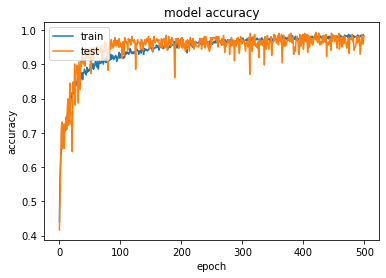

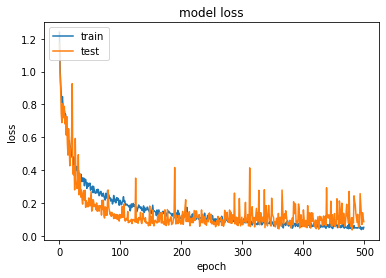

{'loss': [1.2393224239349365,
  1.03463876247406,
  0.9220088124275208,
  0.8612197637557983,
  0.8116744160652161,
  0.8472626805305481,
  0.779209554195404,
  0.769126296043396,
  0.7662093639373779,
  0.7392147779464722,
  0.7406029105186462,
  0.7074881196022034,
  0.6716619729995728,
  0.6454647779464722,
  0.6066235303878784,
  0.5710018277168274,
  0.577784538269043,
  0.5511772036552429,
  0.545370876789093,
  0.5338640213012695,
  0.4886361062526703,
  0.47730785608291626,
  0.47534993290901184,
  0.4798092842102051,
  0.4288257360458374,
  0.47289541363716125,
  0.39832478761672974,
  0.39728105068206787,
  0.40071791410446167,
  0.42295730113983154,
  0.3614915907382965,
  0.4012938439846039,
  0.3796473741531372,
  0.3635082244873047,
  0.33918923139572144,
  0.37550970911979675,
  0.33544641733169556,
  0.3295983076095581,
  0.35268229246139526,
  0.33278486132621765,
  0.35068899393081665,
  0.3045671284198761,
  0.34106895327568054,
  0.34379634261131287,
  0.32120409607

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history